# **MNIST dataset**

La base de datos MNIST, puede importarse directamente a través de Keras. Esta importación arroja cuatro conjuntos de numpy arrays

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# **Construcción de la CNN**

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Capa convolucional 1
model.add(layers.MaxPooling2D((2, 2))) #Capa max pooling 1
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #Capa convolucional 2
model.add(layers.MaxPooling2D((2, 2))) #Capa max-pooling 2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #Capa convolucional 3

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

# **Preprocesamiento de las imágenes de entrada**

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# **Compilación y entrenamiento**

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1758 - accuracy: 0.9450
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0476 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0329 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0192 - accuracy: 0.9941


# **Curvas de precisión y pérdida**

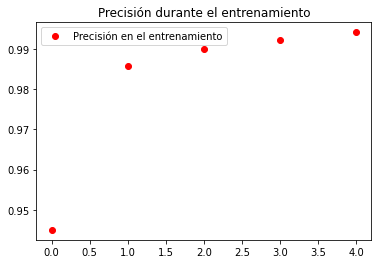

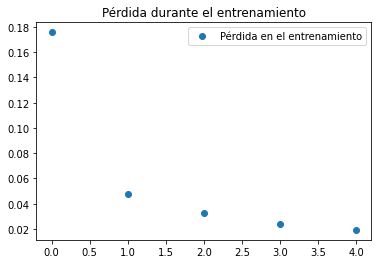

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Precisión en el entrenamiento')
plt.title('Precisión durante el entrenamiento')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'o', label='Pérdida en el entrenamiento')
plt.title('Pérdida durante el entrenamiento')
plt.legend()

plt.show()

# **Evaluación del modelo entrenado**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9915


In [ ]:
test_acc

0.9915000200271606